### Disclaimer: I hold no ownership over this notebook. This is documented by [Dr.Dhimant Ganatra](https://www.linkedin.com/in/dhimant-ganatra-3a6ba79/?originalSubdomain=in), my professor in R Programming

# Table of Contents:
1. [Hypothesis testing](#section-one)
    - [Normality](#subsection-one)
    - [Correlation Test Between Two Variables](#subsection-two)
    - [Correlation Test Between Multiple Variables](#subsection-three)
    - [Comparing the means of two groups(one sample t-test)](#subsection-four)
    - [Comparing the means of two independent groups(two sample t-test)](#subsection-five)
    - [Comparing the means of more than two groups(ANOVA)](#subsection-six)
    - [Homogeneity of variance](#subsection-seven)
    - [Check the normality assumption](#subsection-eight)
    - [Chi-square goodness-of-fit test](#subsection-nine)
    - [Chi-square test of independence](#subsection-ten)
    - [One-sample Wilcoxon signed rank test](#subsection-eleven)
    - [Mann Whitney U Test (Wilcoxon Rank Sum Test)](#subsection-twelve)
    
    

<a id="section-one"></a>
# Hypothesis testing

Hypothesis is a claim made by a person/organisation.  Such claims are usually about population parameters like mean and we seek evidence from a sample for the support of the claim. <br>

Hypothesis testing is one of the most important concepts in analytics. Hypothesis testing consists of two complementary statements called null and alternative hypothesis, and only one of them is true. Hypothesis testing is a process used for either rejecting or retaining a null hypothesis.<br>

## Null and alternative hypothesis: 
A null hypothesis usually denoted as H0 refers to the statement that there is no relationship or no difference between different groups with respect to the value of a population parameter. At the beginning we assume that the null hypothesis is true and try to retain it unless there is strong evidence against it. Alternative hypothesis usually denoted as H1 is what the researcher believes to be true and would like to reject the null hypothesis.

## One-tailed and two-tailed test: 
Statistical hypotheses are written such that they will produce either a one-tailed (left/right tailed) or a two-tailed test. In a one-tailed test the rejection region will be only on one side (left/right) of the distribution. One-tailed tests are directional. For a two-tailed test, the rejection region is on either side of the distribution. Two tailed tests always use the equality and the non-equality symbols in the hypotheses and are directionless.
## Decision Criteria: 
After we have stated the null and alternative hypothesis, the next step is to decide what criterion to use for deciding whether to accept or reject the null hypothesis. Significance value, usually denoted by alpha (α), is the criteria used for taking this decision. The chosen value of alpha may depend on the context of the problem. The usual values of alpha are 0.01 (one percent), 0.05 and 0.1. 
## Test statistic: 
Test statistic is the standardised difference between the estimated value of the parameter being tested calculated from the sample and the hypothesis value in order to establish the evidence in support of the null hypothesis. The test statistic that we will mostly use in this module will be Z and t

The cases in which the test statistic is Z are
* 	Population standard deviation is known, and the population is normal
* 	Population standard deviation is known, and the sample size is at least 30. Note that the population need not be normal

The formula for calculating Z is –

### Z=  (X - μ)/(σ /(√n))

*   X is the sample mean
* 	μ is the hypothesised value of population mean
* 	σ is the population standard deviation and
* 	n is the sample size
 
We use the t-statistic when the population is normal, and population standard deviation is unknown but the sample standard deviation ‘S’ is known. t-test is a robust test for violation of normality of the data as long as the data is close to symmetry and there are no outliers.

The formula for calculating t statistic is – 

### t=  (X - μ)/(S /(√n))

Concluding Step – Decision of Hypothesis test: In hypothesis test we end up with one of the below decision – 
* 	Reject the Null Hypothesis
* 	Fail to Reject (Retain) the Null Hypothesis

We can reach a statistical conclusion using either p-value or critical value method. We will prefer the p-value approach.

**p-value** is the evidence in support of null hypothesis. The decision to reject or retain the null hypothesis will depend on whether the calculated p-value crosses the threshold value alpha or not. The decision criteria is as shown below –
* p-value < α	Reject the null hypothesis
* p-value ≥ α 	Retain the null hypothesis

## Statistical Tests and Assumptions

Many of statistical tests including correlation, regression, t-test, and analysis of variance (ANOVA) assume some certain characteristics about the data. 
Generally, they assume that:
* 	the data are normally distributed
* 	and the variances of the groups to be compared are homogeneous (equal)

These tests are called parametric tests, because their validity depends on the distribution of the data. Before using a parametric test, we should perform some preliminary tests to make sure that the test assumptions are met. In the situations where the assumptions are violated, non-parametric tests are recommended.

## How to assess the normality? 
If the sample size is large enough (n > 30), we can ignore the distribution of the data and use parametric tests. The central limit theorem tells us that no matter what distribution things have, the sampling distribution tends to be normal if the sample is large enough (n > 30).

Normality can be checked by visual inspection using normal plots (histogram), Q-Q plot (quantile-quantile plot) or by significance tests. 

geom_qq and stat_qq produce quantile-quantile plots. geom_qq_line and stat_qq_line compute the slope and intercept of the line connecting the points at specified quartiles of the theoretical and sample distributions.
In the following figure, the top row shows the different density distribution plots; the bottom row shows the normal q-q plots for each distribution.


<a id="subsection-one"></a>
# Normality

In [1]:
library(dplyr)
library(ggplot2)

path <- "../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv" # copy applicable path
placementds <- read.csv(path)
# split the dataset
placementnum <- select(placementds, ends_with("_p"), salary) 
placementcat <- select(placementds, -(ends_with("_p")), -salary)
placedset <- filter(placementds, status == "Placed")
#placedset <- na.omit(placementds) # alternative
notplacedset <- subset(placementds, status == "Not Placed")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




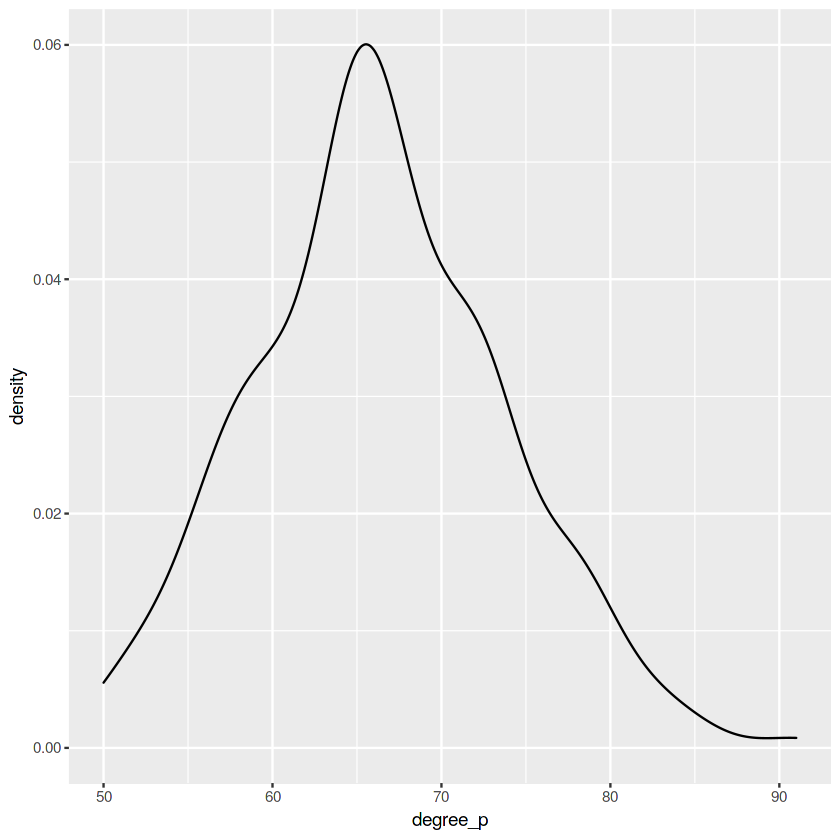

In [2]:
# Assess the normality - Visual methods
ggplot(placementds) + geom_density(aes(degree_p)) # density plot

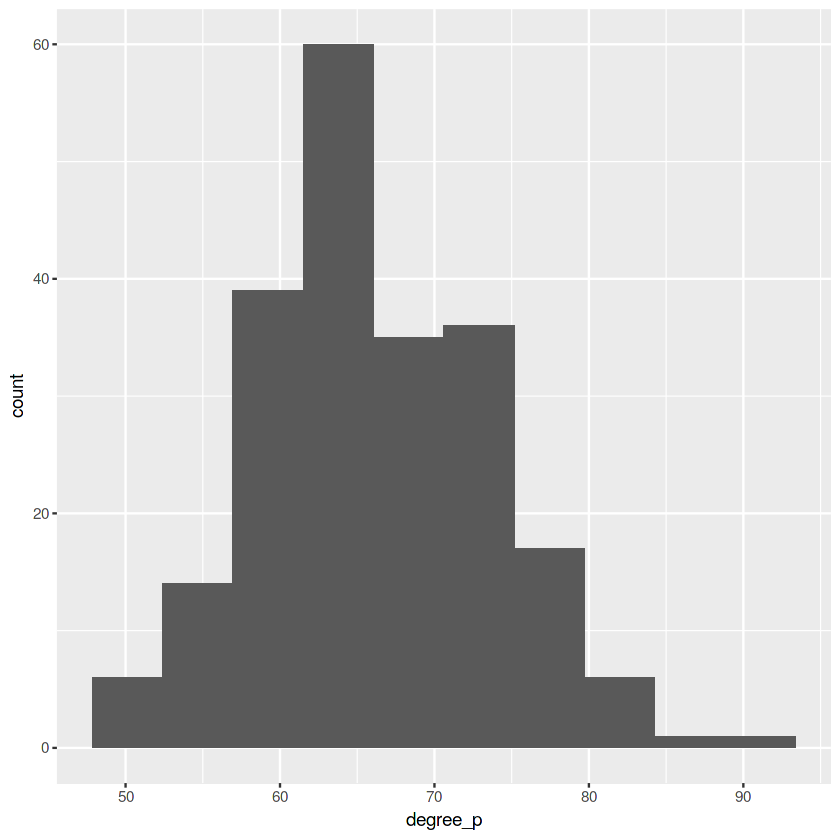

In [3]:
ggplot(placementds) + geom_histogram(aes(degree_p), bins = 10) # histogram

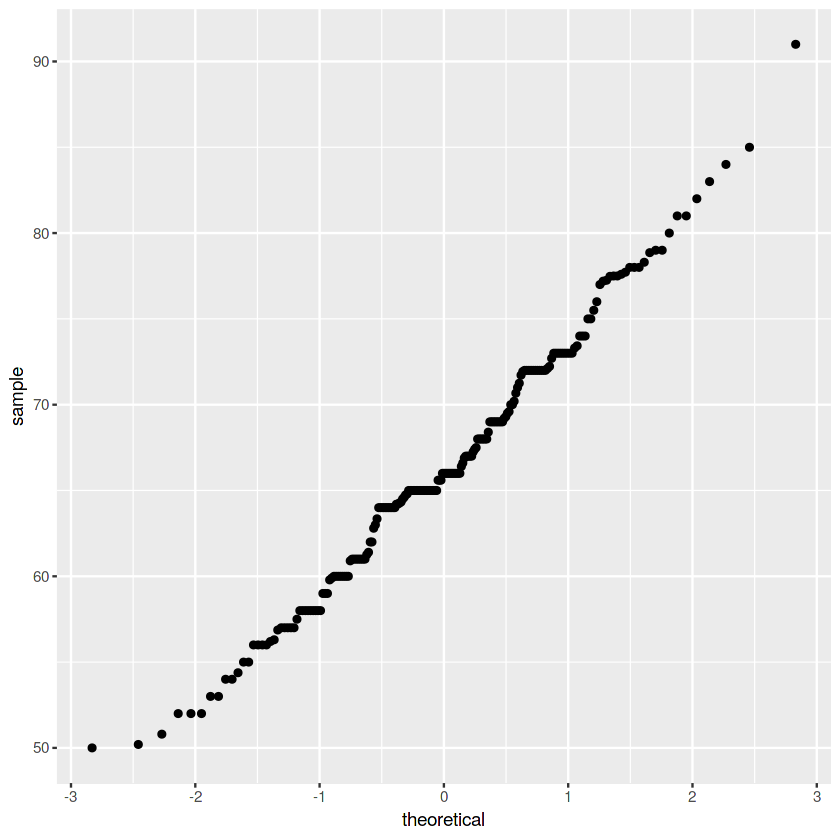

In [4]:
qqbase <- ggplot(placementds, aes(sample=degree_p))
qqbase + geom_qq()

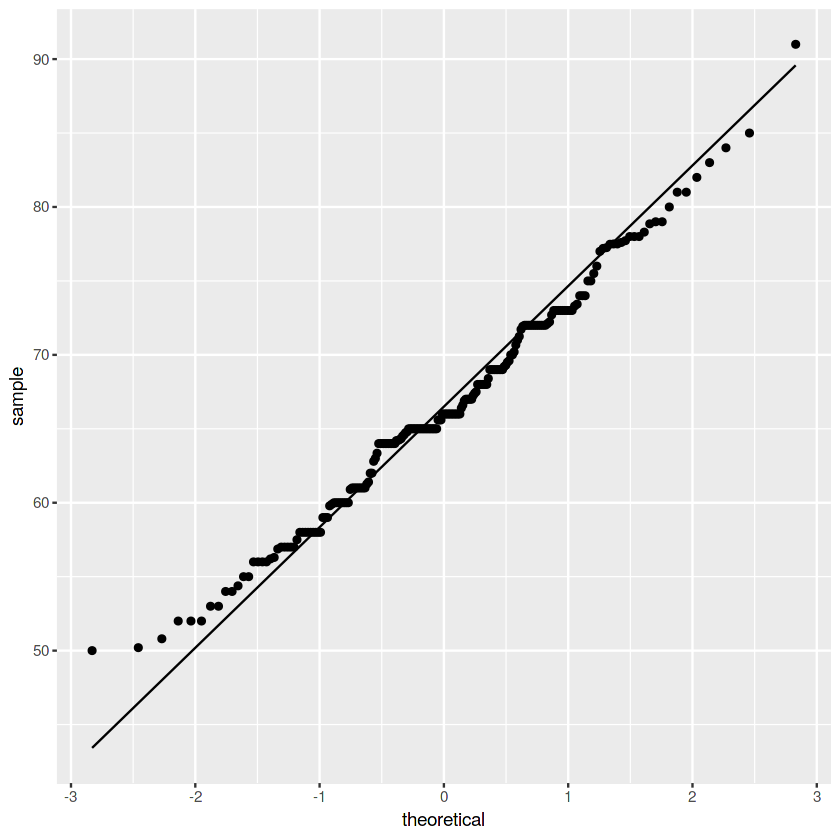

In [5]:
qqbase + geom_qq() + geom_qq_line() # qq plot

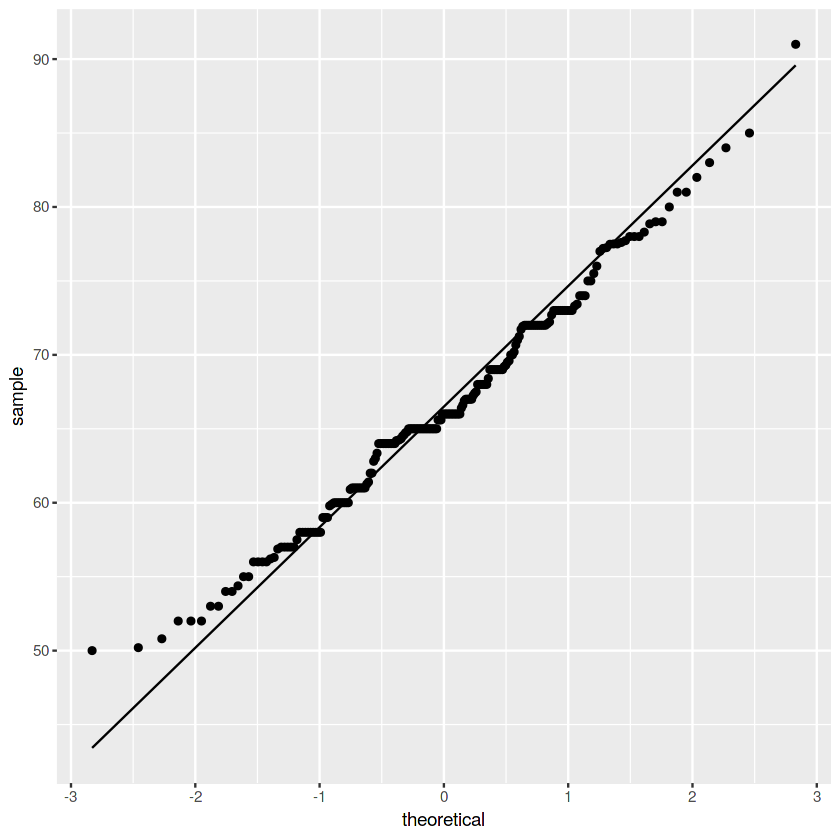

In [6]:
qqbase + stat_qq() + stat_qq_line() # alternative

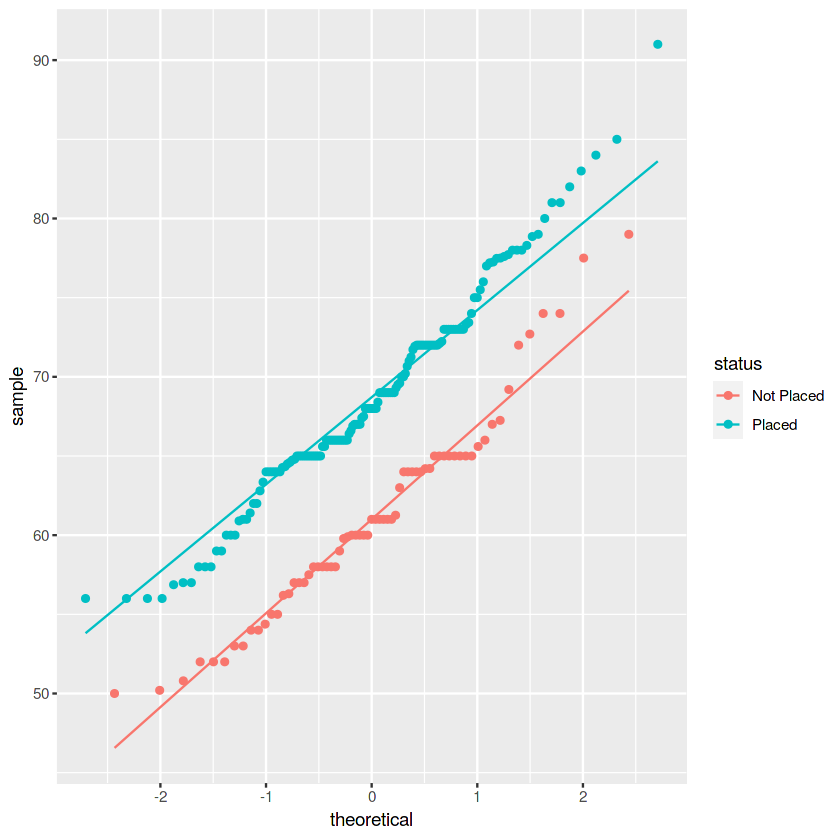

In [7]:
qqbase1 <- ggplot(placementds, aes(sample=degree_p, color = status))
qqbase1 + geom_qq() + geom_qq_line()

Visual inspection is usually unreliable. It is possible to use a significance test comparing the sample distribution to a normal one in order to ascertain whether data show or not a serious deviation from normality.

There are several methods for normality test such as Kolmogorov-Smirnov (K-S) normality test and Shapiro-Wilk’s test.
Shapiro-Wilk’s method is widely recommended for normality test and it provides better power than K-S. It is based on the correlation between the data and the corresponding normal scores.

**Note:** The null hypothesis of these tests is that “sample distribution is normal”. The     p-value ≥ 0.05 (0.05 is our choosen α value) implies that the distribution of the data are not significantly different from normal distribution. In other words, we can assume the normality.


In [8]:
# Shapiro-Wilk's test to test normality
shapiro.test(placementds$degree_p) 
# Note: p>= 0.05 which is our choosen alpha, we can assume normality


	Shapiro-Wilk normality test

data:  placementds$degree_p
W = 0.98904, p-value = 0.1002


In [9]:
shapiro.test(placementds$mba_p)


	Shapiro-Wilk normality test

data:  placementds$mba_p
W = 0.98452, p-value = 0.01883


## How to assess the equality of variances?
If the samples, being compared, follow normal distribution, then it’s possible to use:
* F-test to compare the variances of two samples
* Bartlett’s Test or Levene’s Test to compare the variances of multiple samples.

### Research Questions

The most popular research questions include:
1.	whether two variables (n = 2) are correlated (i.e., associated)
2.	whether multiple variables (n > 2) are correlated
3.	whether two groups (n = 2) of samples differ from each other
4.	whether multiple groups (n >= 2) of samples differ from each other
5.	whether the variability of two samples differ

The above questions can be answered using the following statistical tests:

1.	Correlation test between two variables
2.	Correlation matrix between multiple variables
3.	Comparing the means of two groups
    * 	Student’s t-test (parametric)
    * 	Wilcoxon rank test (non-parametric)
4.	Comparing the means of more than two groups
    * 	ANOVA test (analysis of variance, parametric): extension of t-test to compare more than two groups
    * 	Kruskal-Wallis rank sum test (non-parametric): extension of Wilcoxon rank test to compare more than two groups
5.	Comparing the variances
    * 	Comparing the variances of two groups: F-test (parametric)
    * 	Comparison of the variances of more than two groups: Bartlett’s test (parametric), Levene’s test (parametric) and Fligner-Killeen test (non-parametric)


<a id="subsection-two"></a>
### 1. Correlation Test Between Two Variables

Correlation test is used to evaluate the association between two or more variables. For instance, if we are interested to know whether there is a relationship between degree percentage and MBA percentage, a correlation coefficient can be calculated to answer this question.

There are different methods to perform correlation analysis:
* 	Pearson correlation (r), which measures a linear dependence between two variables (x and y). It is also known as a parametric correlation test because it depends to the distribution of the data. It can be used only when x and y are from normal distribution
* 	Kendall tau and Spearman rho, which are rank-based correlation coefficients (non-parametric)
* Use the function cor.test(x, y) to analyze the correlation coefficient between two variables and to get significance level of the correlation.
**Note:** The null hypotheis is that there is no correlation between the two random varaiables.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



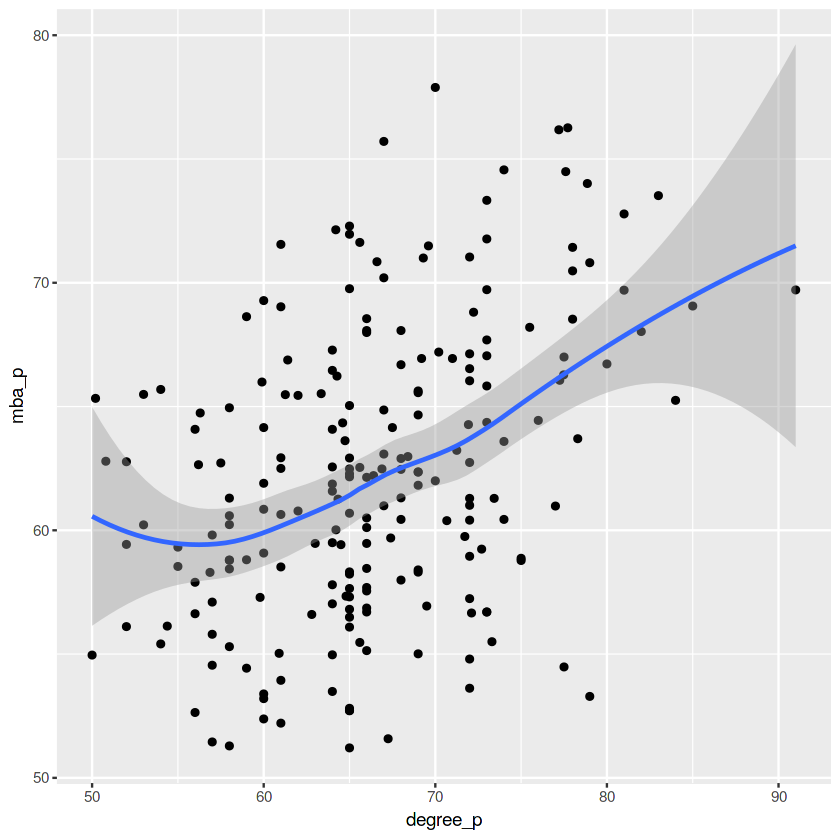

In [10]:
# Correlation test between two variables
ggplot(placementnum, aes(degree_p, mba_p)) + geom_point() + geom_smooth()

In [11]:
cor(placementnum$degree_p, placementnum$mba_p) 

[1] 0.4023638

In [12]:
# Pearson correlation test
cor.test(placementnum$degree_p, placementnum$mba_p)
# Note: p < 0.05, we can conclude the variables are significantly correlated


	Pearson's product-moment correlation

data:  placementnum$degree_p and placementnum$mba_p
t = 6.4145, df = 213, p-value = 8.993e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2838415 0.5087761
sample estimates:
      cor 
0.4023638 


<a id="subsection-three"></a>
### 2.	Correlation Test Between Multiple Variables

A correlation matrix is used to analyze the correlation between multiple variables at the same time. There are different methods for correlation analysis: Pearson parametric correlation test, Spearman and Kendall rank-based correlation analysis. 

The function rcorr() [in Hmisc package] can be used to compute the significance levels for pearson and spearman correlations. It returns both the correlation coefficients and the p-value of the correlation for all possible pairs of columns in the data table.


In [13]:
# Correlation test between multiple variables
round(cor(placementnum, use = "pairwise.complete.obs"), 2)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.00,0.51,0.54,0.26,0.39,0.04
hsc_p,0.51,1.00,0.43,0.25,0.35,0.08
degree_p,0.54,0.43,1.00,0.22,0.40,-0.02
etest_p,0.26,0.25,0.22,1.00,0.22,0.18
mba_p,0.39,0.35,0.40,0.22,1.00,0.18
salary,0.04,0.08,-0.02,0.18,0.18,1.00


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 67 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 67 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 67 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 67 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 67 rows containing missing values”
Warning message:
“Removed 67 rows containing missing values (geom_point).”
Warning message:
“Removed 67 rows containing missing values (geom_point).”
Warning message:
“Removed 67 rows containing missing values (geom_point).”
Warning message:
“Removed 67 rows conta

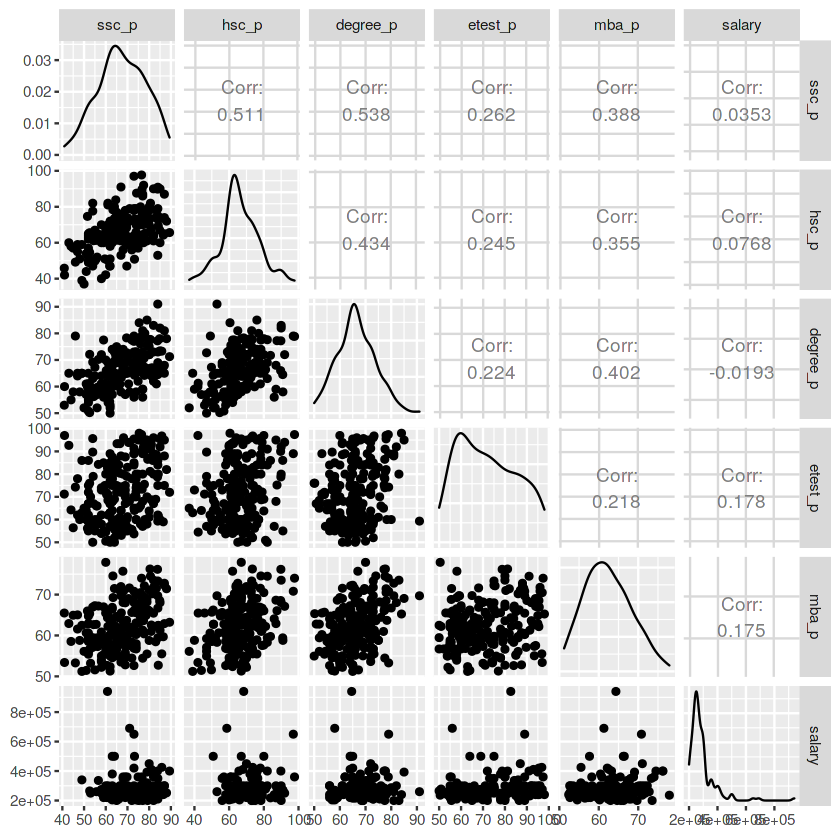

In [14]:
GGally::ggpairs(placementnum)

In [15]:
library(Hmisc)
rcorr(as.matrix(placementnum))

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




         ssc_p hsc_p degree_p etest_p mba_p salary
ssc_p     1.00  0.51     0.54    0.26  0.39   0.04
hsc_p     0.51  1.00     0.43    0.25  0.35   0.08
degree_p  0.54  0.43     1.00    0.22  0.40  -0.02
etest_p   0.26  0.25     0.22    1.00  0.22   0.18
mba_p     0.39  0.35     0.40    0.22  1.00   0.18
salary    0.04  0.08    -0.02    0.18  0.18   1.00

n
         ssc_p hsc_p degree_p etest_p mba_p salary
ssc_p      215   215      215     215   215    148
hsc_p      215   215      215     215   215    148
degree_p   215   215      215     215   215    148
etest_p    215   215      215     215   215    148
mba_p      215   215      215     215   215    148
salary     148   148      148     148   148    148

P
         ssc_p  hsc_p  degree_p etest_p mba_p  salary
ssc_p           0.0000 0.0000   0.0001  0.0000 0.6699
hsc_p    0.0000        0.0000   0.0003  0.0000 0.3534
degree_p 0.0000 0.0000          0.0009  0.0000 0.8162
etest_p  0.0001 0.0003 0.0009           0.0013 0.0301
mba_p    0

<a id="subsection-four"></a>
### 3.	Comparing the means of two groups

#### a.	Comparing one-sample mean to a standard known mean

**One-sample t-test (parametric):** One-sample t-test is used to compare the mean of one sample (m) to a known standard (or theoretical/hypothetical) mean (μ).
Typical research questions are:
1.	whether the mean (m) of the sample is equal to the theoretical mean (μ)? 
(two-tailed test; H0: m = μ and H1 m ≠ μ)
2.	whether the mean (m) of the sample is less than the theoretical mean (μ)? 
(one-tailed test; H0: m ≤ μ and H1 m > μ)
3.	whether the mean (m) of the sample is greater than the theoretical mean (μ)?
(one-tailed test; H0: m ≥ μ and H1 m < μ)

To perform one-sample t-test, the function t.test() can be used.<br>
**Note:** We set the alternative hypotheis as the statement that we would like to prove. 


In [16]:
# One-sample t-test
# Select a sample of size 100
set.seed(25)
mysample <-  sample_n(placementds, size = 100)
summary(mysample$degree_p)

# We want to prove that the average degree_p differs from 60% (two-tailed test)
#H0=60
t.test(mysample$degree_p, mu = 60, alternative = "two.sided") # default is two sided
# Note: p < 0.05,  We can conclude that the mean degree_p is significantly different from 60% 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.20   61.00   65.00   65.97   72.00   84.00 


	One Sample t-test

data:  mysample$degree_p
t = 8.4526, df = 99, p-value = 2.549e-13
alternative hypothesis: true mean is not equal to 60
95 percent confidence interval:
 64.57186 67.37674
sample estimates:
mean of x 
  65.9743 


In [17]:
# We want to prove that the average degree_p is less than 66% (one-tailed test)
# H0 >=66
t.test(mysample$degree_p, mu = 66, alternative = "less")


	One Sample t-test

data:  mysample$degree_p
t = -0.036361, df = 99, p-value = 0.4855
alternative hypothesis: true mean is less than 66
95 percent confidence interval:
     -Inf 67.14786
sample estimates:
mean of x 
  65.9743 


<a id="subsection-five"></a>
#### b.	Comparing the means of two independent groups
The unpaired two-samples t-test is used to compare the mean of two independent groups. <br>
For example, suppose that we have the degree percetange  of 100 students: 50 Female (group A) and 50 Male (group B). We want to know if the mean degree percenatge of Female (mA) is significantly different from that of male (mB). In this case, we have two unrelated (i.e., independent or unpaired) groups of samples. Therefore, it is possible to use an independent t-test to evaluate whether the means are different.
Typical research questions are:
1.	whether the mean of group A (mA) is equal to the mean of group B (mB)?
(two-tailed test; H0: mA = mB and H1 mA ≠ mB)
2.	whether the mean of group A (mA) is less than the mean of group B (mB)?
(one-tailed test; H0: mA ≤ mB and H1 mA > mB)
3.	whether the mean of group A (mA) is greater than the mean of group B (mB)?
(one-tailed test; H0: mA ≥ mB and H1 mA < mB)


To perform two-samples t-test comparing the means of two independent samples (x & y), the function t.test() can be used.
Note:  var.equal: a logical variable indicating whether to treat the variances of the two groups as being equal. If TRUE then the pooled variance (classical t-test) is used to estimate the variance otherwise the Welch-t test is used. The Welch t-test is considered as the safer one.


In [18]:
# Two-sample t-test
# create two samples based on gender
set.seed(25)
malesample <- placementds %>% filter(gender == "M") %>% sample_n(size = 50)
femalesample <- placementds %>% filter(gender == "F") %>% sample_n(size = 50)

# Is there any significant difference between male and female percentage?
t.test(malesample$degree_p, femalesample$degree_p, var.equal = T)
# Note: p < 0.05,  We can conclude that the mean degree_p is significantly different  between the two groups


	Two Sample t-test

data:  malesample$degree_p and femalesample$degree_p
t = -3.2861, df = 98, p-value = 0.00141
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.684915 -1.897885
sample estimates:
mean of x mean of y 
  64.1054   68.8968 


In [19]:
# We want to prove that the average percentage of male is less than that of female
#H0: mm ≥ mf 
t.test(malesample$degree_p, femalesample$degree_p, var.equal = T, alternative = "less")


	Two Sample t-test

data:  malesample$degree_p and femalesample$degree_p
t = -3.2861, df = 98, p-value = 0.0007052
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.370181
sample estimates:
mean of x mean of y 
  64.1054   68.8968 


In [20]:
# Method 2 - If the data are saved in single dataframe
t.test(degree_p~gender, data = mysample, var.equal = T)


	Two Sample t-test

data:  degree_p by gender
t = 1.6903, df = 98, p-value = 0.09415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4291601  5.3610351
sample estimates:
mean in group F mean in group M 
       67.55250        65.08656 


In [21]:
# Welch t-statistic (unequal varaince)
t.test(degree_p~gender, data = mysample, var.equal = F)


	Welch Two Sample t-test

data:  degree_p by gender
t = 1.6482, df = 67.392, p-value = 0.104
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5200368  5.4519118
sample estimates:
mean in group F mean in group M 
       67.55250        65.08656 


<a id="subsection-six"></a>
### c.	Comparing the means of more than two groups

**ANOVA:** In many situations, we may have to conduct a hypothesis test to compare mean values simultaneously for more than two groups (samples). In such cases we use the Analysis of Variance (ANOVA) to understand the differences in population means. <br>
The objective of ANOVA is to check simultaneously whether population mean from more than two populations are different.

**One-way ANOVA**
The one-way analysis of variance (ANOVA), also known as one-factor ANOVA, is an extension of independent two-samples t-test for comparing means in a situation where there are more than two categories (levels). In one-way ANOVA, the data is organized into several groups based on one single grouping variable (also called factor variable).<br>
In other words, we would like to study the impact of a single treatment (factor) at different levels (thus forming groups) on a continuous response variable (or outcome variable).<br>
Example: The variable degree_t is the treatment (factor) and CM, ST and Ot are the different levels (3 in this case) which are likely to have varying impact on the mba_p (outcome/response variable)<br>
ANOVA model is robust and minor violations of the assumptions of normality and equal variance may not result in incorrect decision.<br>
The function aov() can be used. The function summary.aov() is used to summarize the analysis of variance model.



**ANOVA test hypotheses:**
* 	Null hypothesis: the means of the different groups are the same
* 	Alternative hypothesis: At least one sample mean is not equal to the others


[1] "Comm&Mgmt" "Others"    "Sci&Tech"

degree_t,count,mean(mba_p),sd(mba_p)
<fct>,<int>,<dbl>,<dbl>
Comm&Mgmt,145,61.86538,5.744348
Others,11,61.37455,6.197211
Sci&Tech,59,63.46119,5.916242


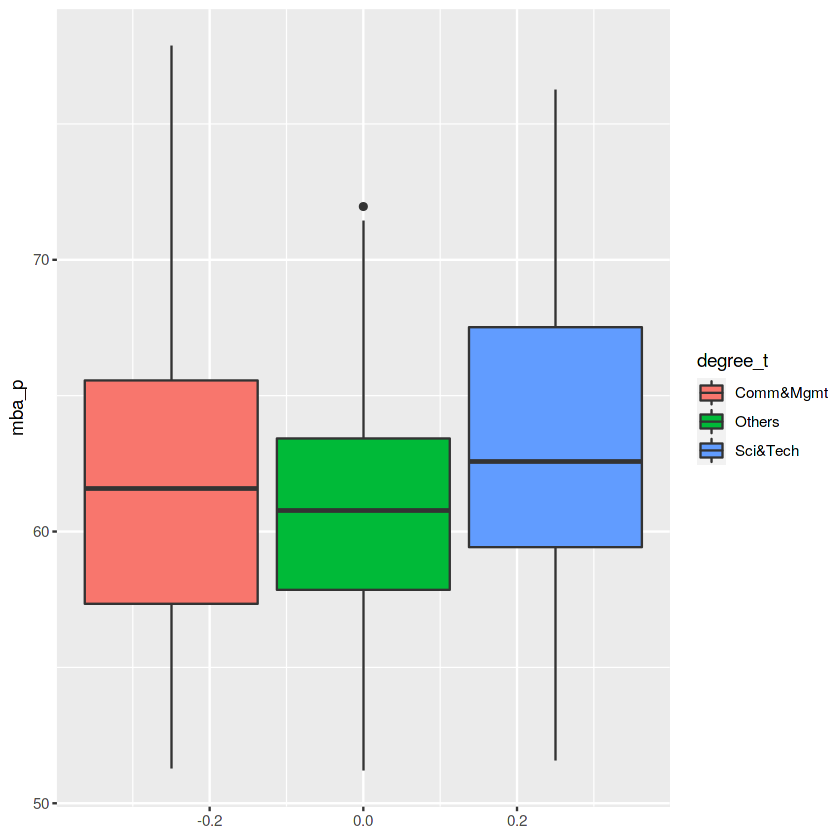

In [22]:
# one-way ANOVa
levels(placementds$degree_t)
# compute the summary statistics for understanding
placementds %>% group_by(degree_t) %>% summarise(count = n(), 
                                                 mean(mba_p), sd(mba_p))
# visualise for a better understanding
ggplot(placementds, aes(y=mba_p)) +geom_boxplot(aes(fill = degree_t))

In [23]:
# we want to check whether type of degree had any siginifcant impact on the average MBA %
myaov1 <-  aov(mba_p ~ degree_t, data = placementds)
summary.aov(myaov1)
# Note: p >= 0.05,  We can conclude that the mean MBA % under different degree type are same

             Df Sum Sq Mean Sq F value Pr(>F)
degree_t      2    116   58.13    1.72  0.182
Residuals   212   7166   33.80               

<a id="subsection-seven"></a>
### a. Homogeneity of variance


	Bartlett test of homogeneity of variances

data:  mba_p by degree_t
Bartlett's K-squared = 0.15907, df = 2, p-value = 0.9235


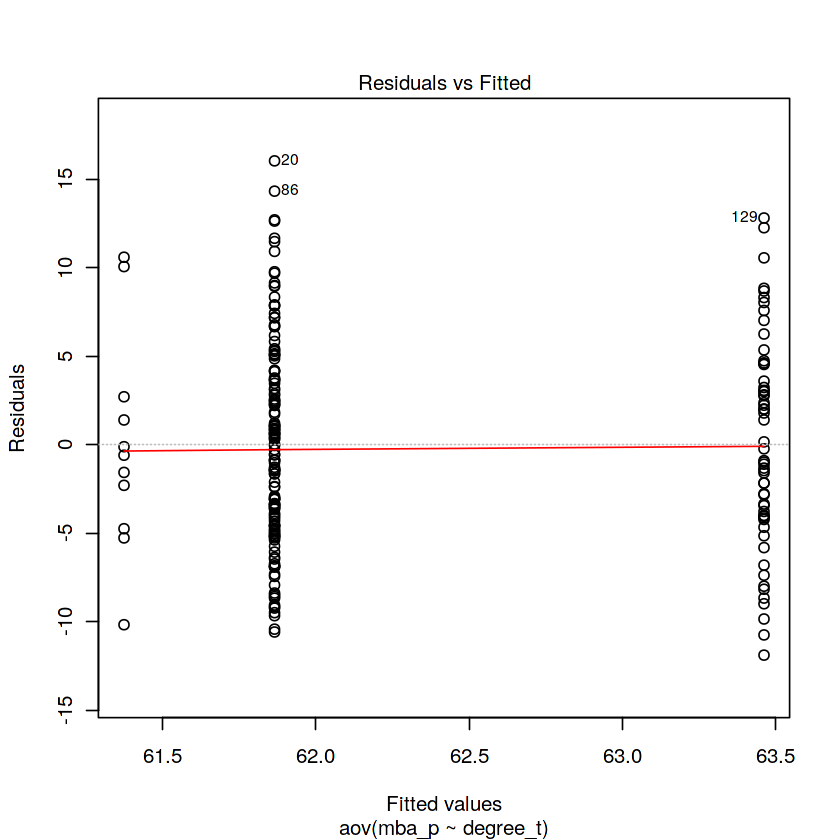

In [24]:
# Diagnostic Checking
plot(myaov1, 1)
bartlett.test(mba_p ~ degree_t, data = placementds)
# Null hypothesis is there is homogenity of variances across groups

<a id="subsection-eight"></a>
### b. Check the normality assumption


	Shapiro-Wilk normality test

data:  myaov1residuals
W = 0.98593, p-value = 0.03161


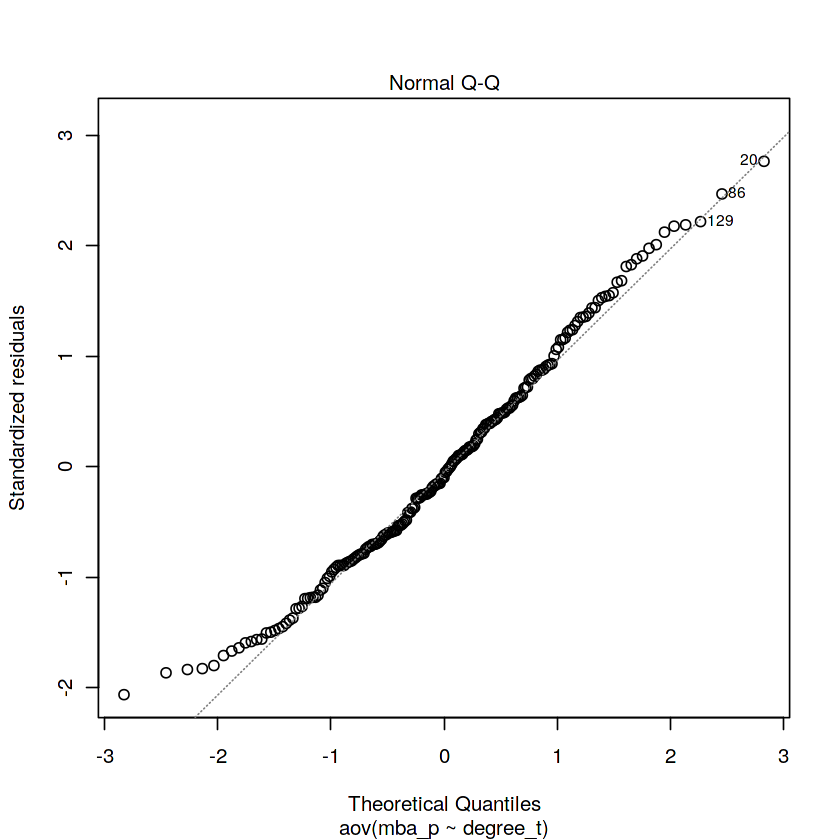

In [25]:
plot(myaov1, 2)
myaov1residuals <- residuals(myaov1)
shapiro.test(myaov1residuals)
# Note: normality assumption is violated

### Two-way ANOVA
Two-way ANOVA test is used to evaluate simultaneously the effect of two grouping variables (factors) on a response variable. The number of levels can vary between factors. The level combinations of factors are called cell.
Example: In addition to the type of degree, the specialisation opted by the student in MBA may also play an important role in the MBA %age. Here we would like to understand the impact of both factors (degree_t and specialisation) simultaneously on MBA %age.


# Nonparametric Statistics
Parametric statistics are statistical techniques based on assumptions about the population from which the sample data are selected. For example- If a t-statistic is used to conduct a hypothesis test about a population mean, the assumption is that the data being analysed are randomly selected from a normally distributed population. The name parametric statistics refers to the fact that an assumption (here, normally distributed data) is being made about the data used to test or estimate the parameter (in this case, the population mean). In addition, the parametric statistics requires quantitative measurements that yield interval or ratio level data.<br>
For data that do not meet the assumptions about the population, or when the level of data being measured is qualitative, statistical techniques called nonparametric or distribution-free techniques are used. A variety of nonparametric statistics are available for use with nominal or ordinal data. A few important techniques are Mann-Whitney U test, Wilcoxon matched-pairs signed ranks test, Kruskal-Wallis test, Friedman test, chi-square test of goodness-of-fit, and chi-square test of independence. <br>
<a id="subsection-nine"></a>
## Chi-square goodness-of-fit test
The chi-square goodness-of-fit test compares the expected, or theoretical, frequencies of categories from a population distribution to the observed, or actual, frequencies from a distribution to determine whether there is a difference between what was expected and what was observed. <br>
For example- The Director of a B-school theorizes that 60% of the students joining the MBA program come from Commerce & Management degree, 35% from Science and Technology background, and 5% with other degrees. To validate or reject this expected distribution, an actual sample of students is gathered randomly, and the observed results are compared to the expected results with chi-square goodness-of-fit test.<br>
The null and alternative hypotheses in chi-square goodness-of-fit test are<br><br>
**Null:** There is no statistically significant difference between the observed frequencies and the expected frequencies (The observed distribution is the same as the expected distribution)<br><br>
**Alternative:** There is a statistically significant difference between the observed frequencies and the expected frequencies (The observed distribution is not the same as the expected distribution)<br>

The R function chisq.test() is used as below-
chisq.test(x, p)
where, 
* x: a numeric vector showing the observed frequencies as absolute values (i.e. counts) <br>
* p: a vector of probabilities of the same length of x showing the expected frequencies as probabilities or proportions<br>

**Note:** The chi-square test should be used only when all calculated expected values are greater than 5


In [26]:
# chi-square goodness of fit test
deg_count <-  table(placementcat$degree_t)
deg_count


Comm&Mgmt    Others  Sci&Tech 
      145        11        59 

In [27]:
chi_degree <- chisq.test(deg_count, p = c(0.6, 0.05, 0.35))
chi_degree
# Note: p >= 0.05,  We retain the null


	Chi-squared test for given probabilities

data:  deg_count
X-squared = 5.4994, df = 2, p-value = 0.06395


In [28]:
chi_degree$expected #(should be greater than 5)

Comm&Mgmt    Others  Sci&Tech 
   129.00     10.75     75.25

# Nonparametric Statistics
Parametric statistics are statistical techniques based on assumptions about the population from which the sample data are selected. For example- If a t-statistic is used to conduct a hypothesis test about a population mean, the assumption is that the data being analysed are randomly selected from a normally distributed population. The name parametric statistics refers to the fact that an assumption (here, normally distributed data) is being made about the data used to test or estimate the parameter (in this case, the population mean). In addition, the parametric statistics requires quantitative measurements that yield interval or ratio level data.<br>
For data that do not meet the assumptions about the population, or when the level of data being measured is qualitative, statistical techniques called nonparametric or distribution-free techniques are used. A variety of nonparametric statistics are available for use with nominal or ordinal data. A few important techniques are Mann-Whitney U test, Wilcoxon matched-pairs signed ranks test, Kruskal-Wallis test, Friedman test, chi-square test of goodness-of-fit, and chi-square test of independence. <br>
<a id="subsection-nine"></a>
## Chi-square goodness-of-fit test
The chi-square goodness-of-fit test compares the expected, or theoretical, frequencies of categories from a population distribution to the observed, or actual, frequencies from a distribution to determine whether there is a difference between what was expected and what was observed. <br>
For example- The Director of a B-school theorizes that 60% of the students joining the MBA program come from Commerce & Management degree, 35% from Science and Technology background, and 5% with other degrees. To validate or reject this expected distribution, an actual sample of students is gathered randomly, and the observed results are compared to the expected results with chi-square goodness-of-fit test.<br>
The null and alternative hypotheses in chi-square goodness-of-fit test are<br><br>
**Null:** There is no statistically significant difference between the observed frequencies and the expected frequencies (The observed distribution is the same as the expected distribution)<br><br>
**Alternative:** There is a statistically significant difference between the observed frequencies and the expected frequencies (The observed distribution is not the same as the expected distribution)<br>

The R function chisq.test() is used as below-
chisq.test(x, p)
where, 
* x: a numeric vector showing the observed frequencies as absolute values (i.e. counts) <br>
* p: a vector of probabilities of the same length of x showing the expected frequencies as probabilities or proportions<br>

**Note:** The chi-square test should be used only when all calculated expected values are greater than 5
<a id="subsection-ten"></a>
## Chi-square test of independence
Chi-square test of independence is a hypothesis test that can be used to analyse the frequencies of two variables with multiple categories to determine whether the two variables are independent. In a sense, the Chi-square test of independence is a test whether the variables are related.<br>
For example- The Director of a B-school is interested in checking whether or not placement depends on the type of degree or on choice of specialisation<br>
The null and alternative hypotheses in Chi-square test of independence are<br>
* **Null:** The two variables are independent (not related)
* **Alternative:** The variables are dependent (related)


In [29]:
# Chi-square test of independence
table(placementcat$degree_t, placementcat$status)
chi_degpla <- chisq.test(placementcat$degree_t, placementcat$status)
chi_degpla
# Note: p >= 0.05,  We retain the null

           
            Not Placed Placed
  Comm&Mgmt         43    102
  Others             6      5
  Sci&Tech          18     41

Warning message in chisq.test(placementcat$degree_t, placementcat$status):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  placementcat$degree_t and placementcat$status
X-squared = 2.969, df = 2, p-value = 0.2266


In [30]:
chi_degpla$expected # reason for the approximation may be incorrect warning

,Not Placed,Placed
Comm&Mgmt,45.186047,99.813953
Others,3.427907,7.572093
Sci&Tech,18.386047,40.613953


In [31]:
# different variable
chisq.test(placementcat$specialisation, placementcat$status)


	Pearson's Chi-squared test with Yates' continuity correction

data:  placementcat$specialisation and placementcat$status
X-squared = 12.44, df = 1, p-value = 0.0004202


<a id="subsection-eleven"></a>
## One-sample Wilcoxon signed rank test
The one-sample Wilcoxon signed rank test is a non-parametric alternative to one-sample t-test when the data cannot be assumed to be normally distributed. It is used to determine whether the median of the sample is equal to a known standard value (i.e. theoretical value).


In [32]:
# One-sample Wilcoxon signed rank test
# first, check for normality
# Shapiro-Wilk's test to test normality
shapiro.test(placementds$salary)
# Note: p<0.05, reject null and hence we cannot assume normality



	Shapiro-Wilk normality test

data:  placementds$salary
W = 0.67588, p-value < 2.2e-16


In [33]:
# We want to prove that the median salary differs from Rs.250000 (two-tailed test)
#H0=250000
wilcox.test(placementds$salary, mu = 250000, alternative = "two.sided")
# Note: p < 0.05,  We can conclude that the median salary is significantly different from 250000


	Wilcoxon signed rank test with continuity correction

data:  placementds$salary
V = 6500, p-value = 1.792e-07
alternative hypothesis: true location is not equal to 250000


In [34]:
# We want to prove that the median salary is less than Rs.275000 (one-tailed test)
# H0 >=275000
wilcox.test(placementds$salary, mu = 275000, alternative = "less")


	Wilcoxon signed rank test with continuity correction

data:  placementds$salary
V = 4808, p-value = 0.2463
alternative hypothesis: true location is less than 275000


<a id="subsection-twelve"></a>
## Mann Whitney U Test (Wilcoxon Rank Sum Test)
The Mann Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test is a non-parametric alternative to the unpaired two-samples t-test, which can be used to compare two independent groups of samples. It is used when data are not normally distributed.<br>
**Note:** Specify Paired = T so as to get alternative to paired t-test


In [35]:
# Mann Whitney U Test
# explore the median
group_by(placementds, gender) %>% summarise(median(salary, na.rm = T))

# Is there any significant difference between male and female salary?
wilcox.test(salary~gender, data = placementds)
# Note: p < 0.05, We can conclude that the median salary is significantly different between the genders


gender,"median(salary, na.rm = T)"
<fct>,<dbl>
F,250000
M,270000



	Wilcoxon rank sum test with continuity correction

data:  salary by gender
W = 1670.5, p-value = 0.002736
alternative hypothesis: true location shift is not equal to 0


# [Part 7:Linear Regression using R](https://www.kaggle.com/benroshan/part-7-linear-regression-using-r?scriptVersionId=34364293)- Click to learn this kernel
# Please hit an upvote if you like this kernel!